In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Loading Dataset
xls=pd.ExcelFile("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Clustering\\EastWestAirlines.xlsx")
ewa=pd.read_excel(xls,'data')
ewa.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
ewa.shape

(3999, 12)

In [5]:
#checking for null values
ewa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
#Descriptio of each column
ewa.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<Figure size 1440x1440 with 0 Axes>

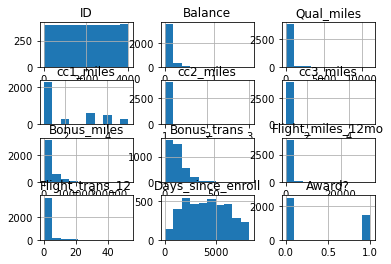

In [7]:
plt.figure(figsize=(20,20))
ewa.hist()
plt.show()

ID                       AxesSubplot(0.125,0.71587;0.227941x0.16413)
Balance               AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Qual_miles            AxesSubplot(0.672059,0.71587;0.227941x0.16413)
cc1_miles               AxesSubplot(0.125,0.518913;0.227941x0.16413)
cc2_miles            AxesSubplot(0.398529,0.518913;0.227941x0.16413)
cc3_miles            AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Bonus_miles             AxesSubplot(0.125,0.321957;0.227941x0.16413)
Bonus_trans          AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Flight_miles_12mo    AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Flight_trans_12            AxesSubplot(0.125,0.125;0.227941x0.16413)
Days_since_enroll       AxesSubplot(0.398529,0.125;0.227941x0.16413)
Award?                  AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

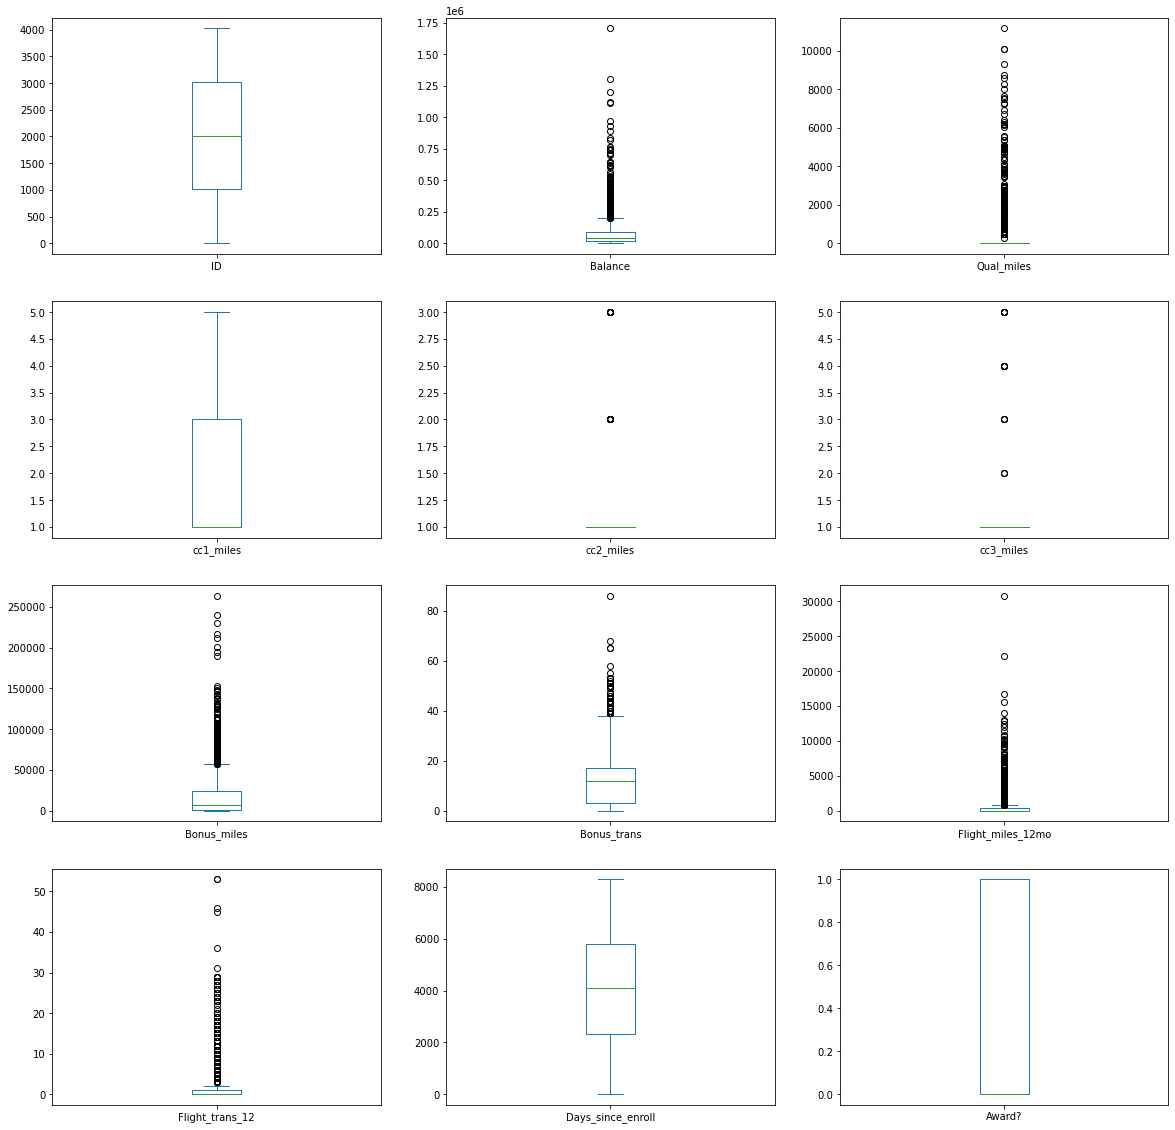

In [8]:
ewa.plot(kind='box',subplots=True,layout=(4,3),figsize=(20,20)) #Boxplot for each column to check the outliers 

In [9]:
ewa.shape

(3999, 12)

from scipy import stats
dfzz=stats.zscore(ewa)
dfabs=np.abs(dfzz)
df_filter=(dfabs<3).all(axis=1)
df_filter

ewa=ewa[df_filter]
ewa.shape

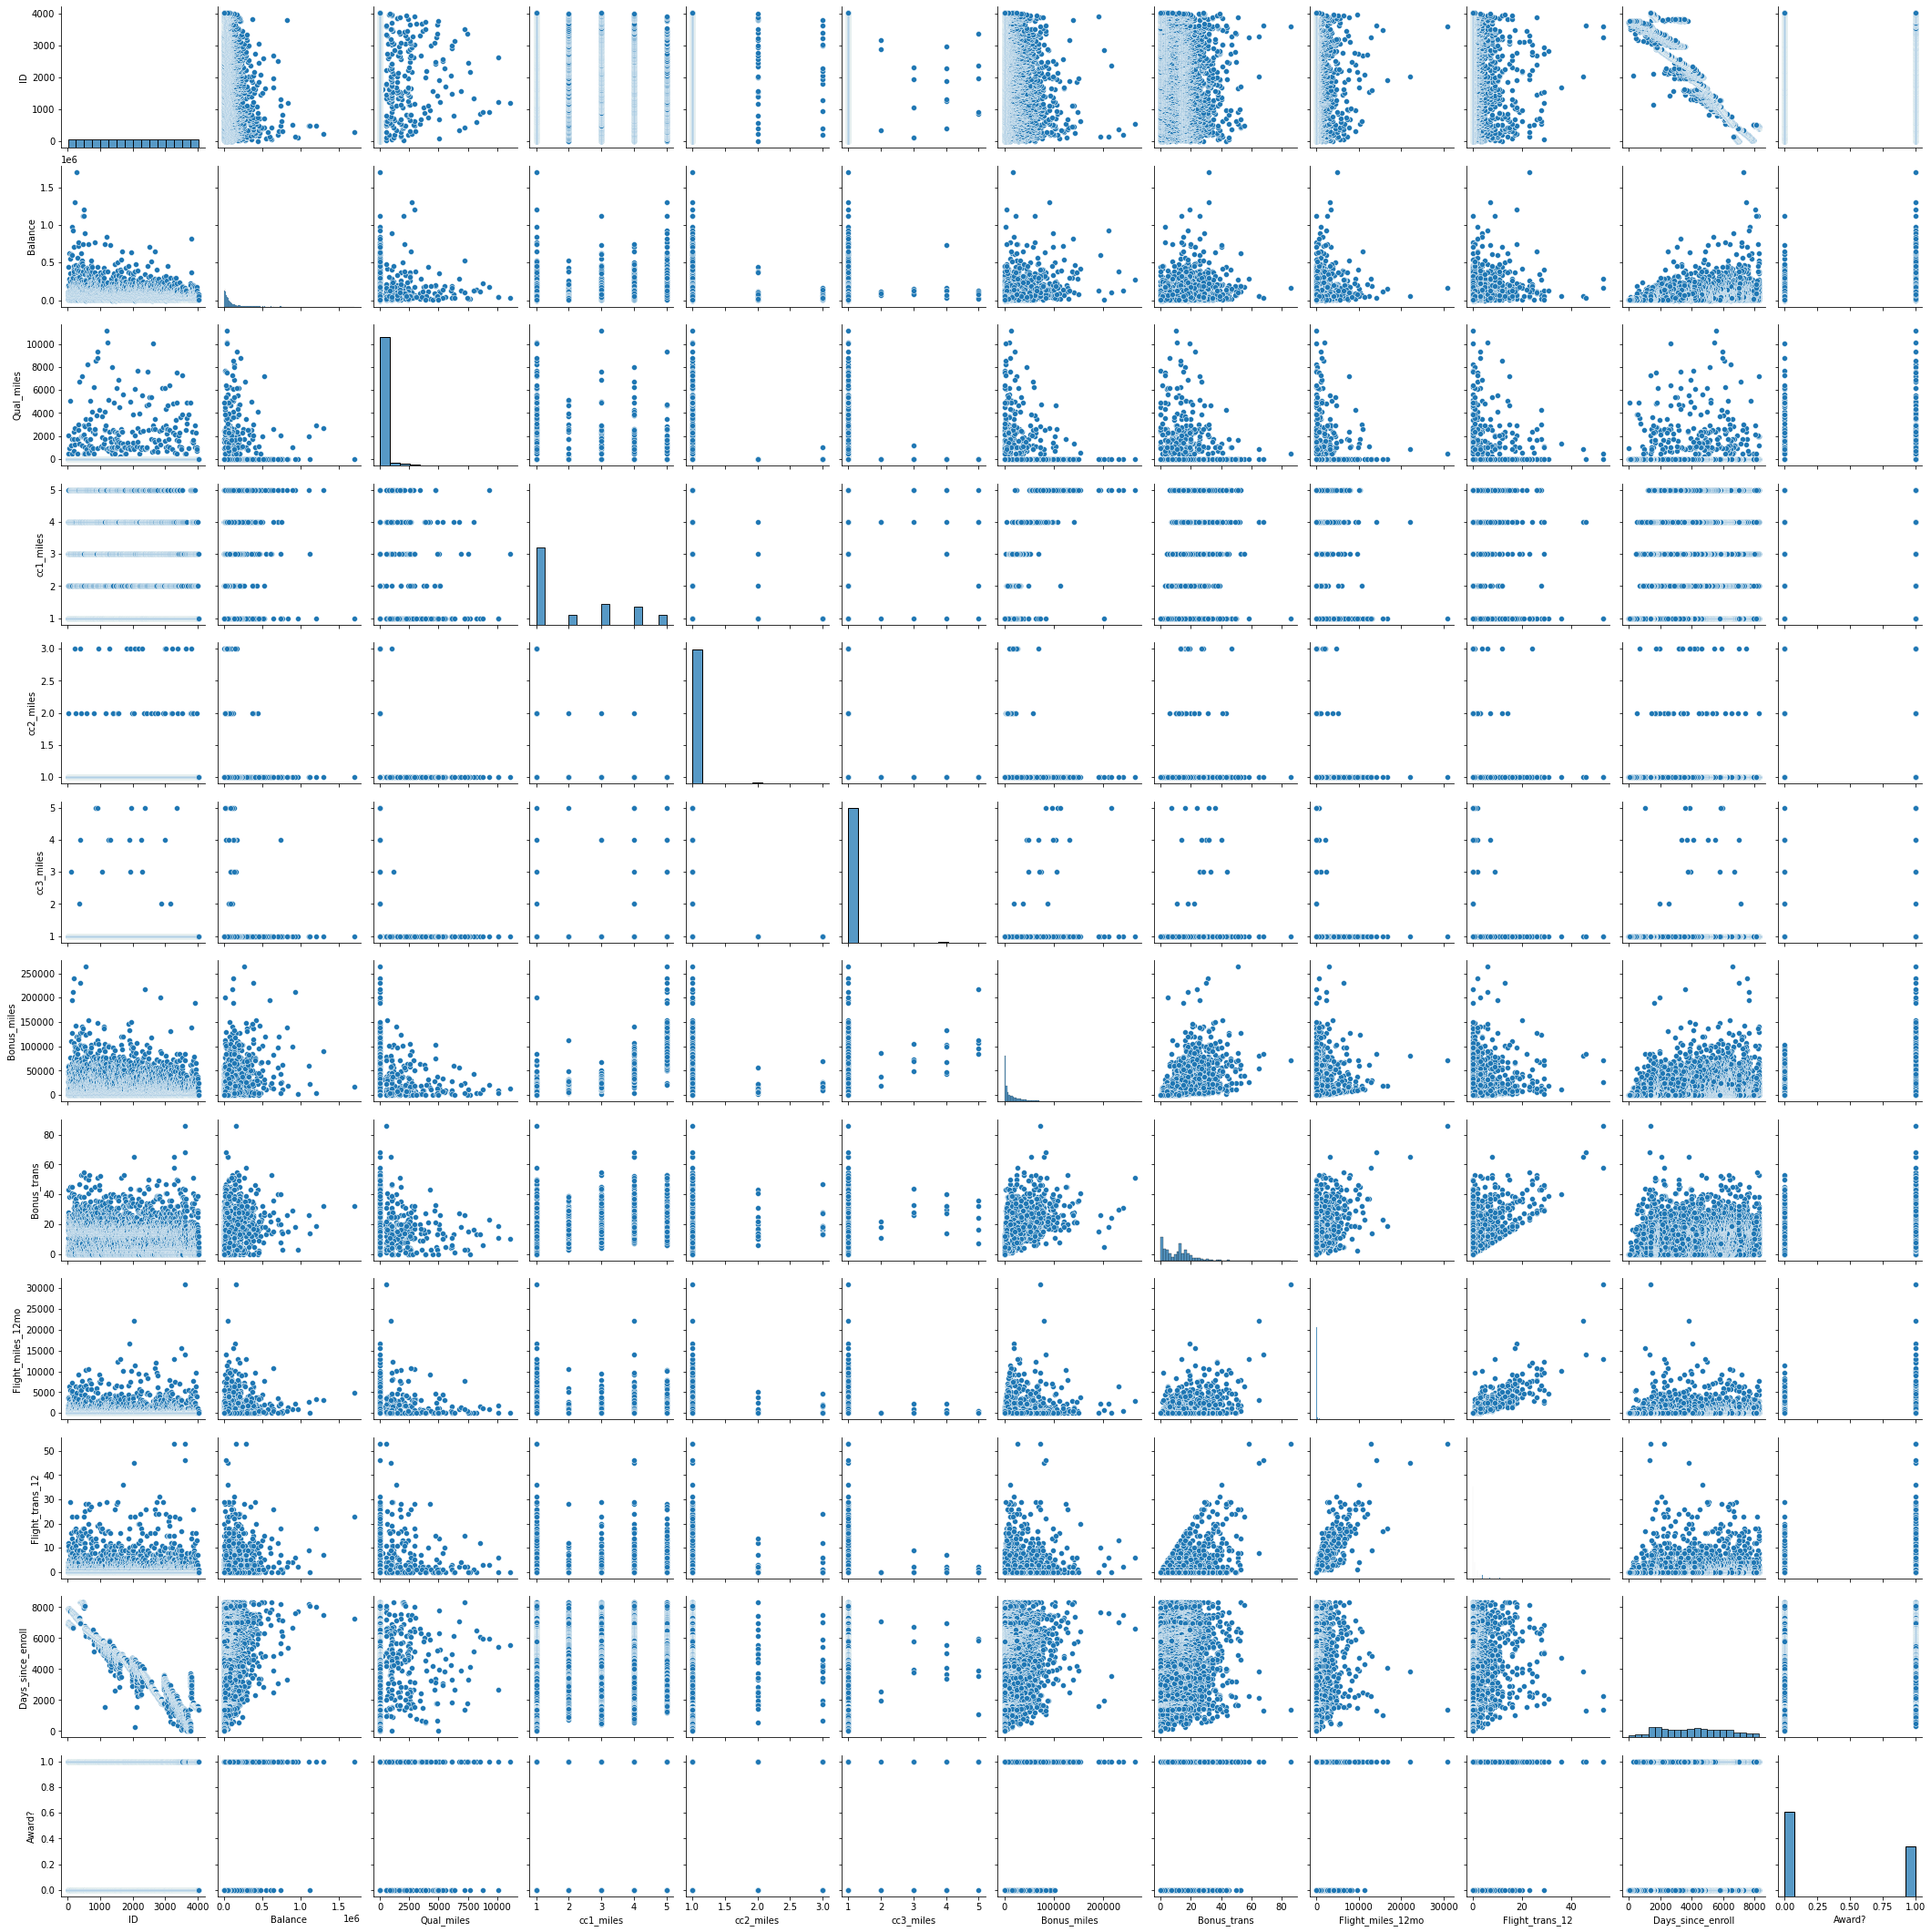

In [10]:
sns.pairplot(ewa) #pairplot to see correlation between the columns 

In [11]:
ewa.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [12]:
ewa1=ewa.drop(['ID'],axis=1) #here id column is not necessary so dropping it

In [13]:
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
from sklearn.preprocessing import MinMaxScaler
norm =MinMaxScaler(feature_range=(2,3))
columns=ewa1.columns
d=norm.fit_transform(ewa1)
ewa2=pd.DataFrame(d,columns=columns)
ewa2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,2.016508,2.0,2.00,2.0,2.0,2.000660,2.011628,2.000000,2.000000,2.843742,2.0
1,2.011288,2.0,2.00,2.0,2.0,2.000815,2.023256,2.000000,2.000000,2.839884,2.0
2,2.024257,2.0,2.00,2.0,2.0,2.015636,2.046512,2.000000,2.000000,2.847842,2.0
3,2.008667,2.0,2.00,2.0,2.0,2.001896,2.011628,2.000000,2.000000,2.837955,2.0
4,2.057338,2.0,2.75,2.0,2.0,2.164211,2.302326,2.067398,2.075472,2.835905,3.0


In [15]:
#scaler=StandardScaler()
#ewa_std=scaler.fit_transform(ewa1)
#ewa2=pd.DataFrame(ewa_std,columns=ewa1.columns)
#ewa2.head()

Balance                  AxesSubplot(0.125,0.71587;0.227941x0.16413)
Qual_miles            AxesSubplot(0.398529,0.71587;0.227941x0.16413)
cc1_miles             AxesSubplot(0.672059,0.71587;0.227941x0.16413)
cc2_miles               AxesSubplot(0.125,0.518913;0.227941x0.16413)
cc3_miles            AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Bonus_miles          AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Bonus_trans             AxesSubplot(0.125,0.321957;0.227941x0.16413)
Flight_miles_12mo    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Flight_trans_12      AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Days_since_enroll          AxesSubplot(0.125,0.125;0.227941x0.16413)
Award?                  AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

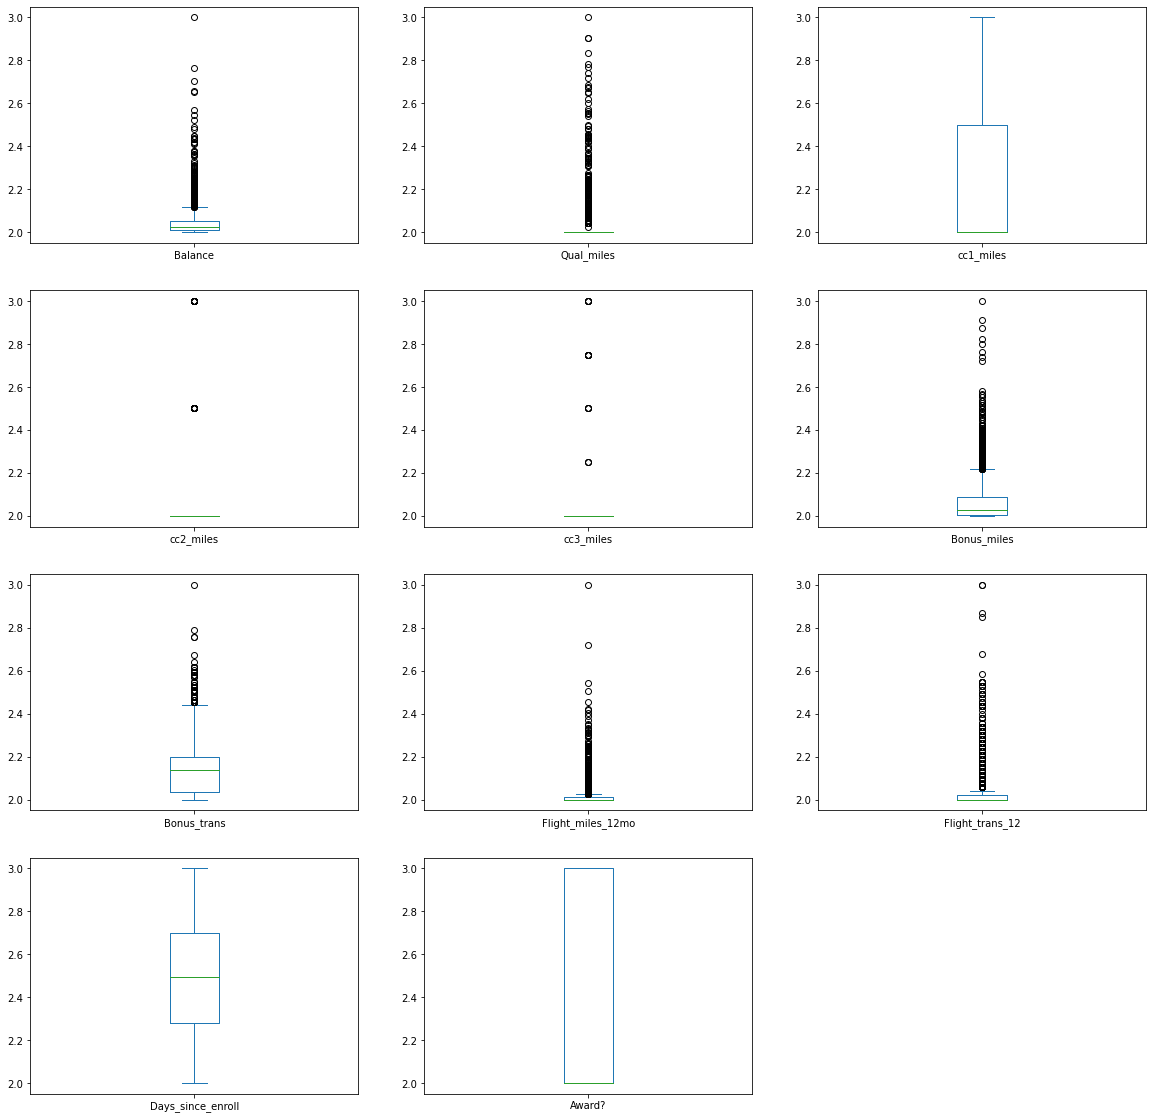

In [16]:
ewa2.plot(kind='box',subplots=True,layout=(4,3),figsize=(20,20))

# Model Creation using DBSCAN

In [17]:
dbscan=DBSCAN(eps=0.9,min_samples=20)
ew_dbscan=dbscan.fit(ewa2)

In [18]:
np.unique(dbscan.labels_)


array([0, 1], dtype=int64)

In [19]:
ewa1['Clusters_dbscan']=dbscan.labels_ #adding dbcan labels to ewa1 to use it with actual dataset
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_dbscan
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [20]:
#Silhoutte score to check the clusters are  correctly divided
from sklearn.metrics import silhouette_score
db_score = silhouette_score(ewa2,dbscan.labels_,metric='euclidean')
db_score

0.5359305109194763

# Model Creation using KMeans Clustering

In [21]:
from sklearn.cluster import KMeans
kmeans=KMeans()

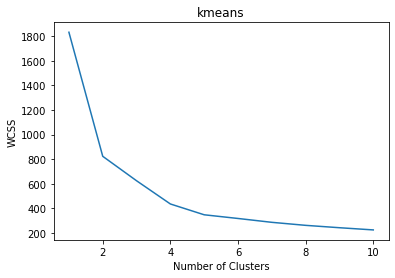

In [22]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(ewa2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('kmeans')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans1=KMeans(n_clusters=5,random_state=0)
ew_kmeans =kmeans1.fit(ewa2)
Clusters=kmeans1.labels_
Clusters

array([4, 4, 4, ..., 0, 1, 1])

In [24]:
np.unique(Clusters)

array([0, 1, 2, 3, 4])

In [25]:
ewa1['Clusters_kmeans']=kmeans1.labels_
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_dbscan,Clusters_kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,4
3,14776,0,1,1,1,500,1,0,0,6952,0,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0


In [26]:
ewa1[ewa1['Clusters_kmeans']==0].mean(),ewa1[ewa1['Clusters_kmeans']==1].mean()

(Balance              108317.387376
 Qual_miles              198.336634
 cc1_miles                 3.915842
 cc2_miles                 1.001238
 cc3_miles                 1.025990
 Bonus_miles           45609.657178
 Bonus_trans              20.201733
 Flight_miles_12mo       713.728960
 Flight_trans_12           2.142327
 Days_since_enroll      4863.439356
 Award?                    1.000000
 Clusters_dbscan           1.000000
 Clusters_kmeans           0.000000
 dtype: float64,
 Balance              33097.301357
 Qual_miles              94.131783
 cc1_miles                1.070736
 cc2_miles                1.016473
 cc3_miles                1.006783
 Bonus_miles           3244.520349
 Bonus_trans              6.173450
 Flight_miles_12mo      212.850775
 Flight_trans_12          0.603682
 Days_since_enroll     1992.402132
 Award?                   0.000000
 Clusters_dbscan          0.000000
 Clusters_kmeans          1.000000
 dtype: float64)

In [27]:
ewa1[ewa1['Clusters_kmeans']==3].mean(),ewa1[ewa1['Clusters_kmeans']==4].mean()

(Balance              83529.153046
 Qual_miles             290.453195
 cc1_miles                1.156018
 cc2_miles                1.032689
 cc3_miles                1.008915
 Bonus_miles           8850.395245
 Bonus_trans             10.476969
 Flight_miles_12mo     1030.112927
 Flight_trans_12          3.148588
 Days_since_enroll     4338.867756
 Award?                   1.000000
 Clusters_dbscan          1.000000
 Clusters_kmeans          3.000000
 dtype: float64,
 Balance              49921.633641
 Qual_miles              89.903226
 cc1_miles                1.122120
 cc2_miles                1.019585
 cc3_miles                1.001152
 Bonus_miles           3467.074885
 Bonus_trans              6.913594
 Flight_miles_12mo      243.834101
 Flight_trans_12          0.728111
 Days_since_enroll     5567.925115
 Award?                   0.000000
 Clusters_dbscan          0.000000
 Clusters_kmeans          4.000000
 dtype: float64)

In [28]:
#Silhoutte score to check the clusters are  correctly divided
km_score=silhouette_score(ewa2,kmeans1.labels_,metric='euclidean')
km_score

0.44306720727960125

# Model Creation using Hierarchical Clustering

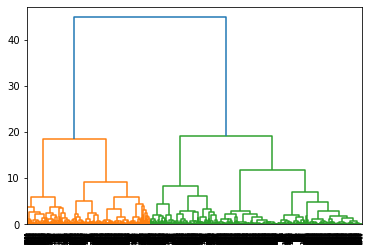

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram=sch.dendrogram(sch.linkage(ewa2,method='ward'))

In [30]:
hc=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='single')
ew_hc=hc.fit(ewa2)

In [31]:
np.unique(ew_hc.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [32]:
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_dbscan,Clusters_kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,4
3,14776,0,1,1,1,500,1,0,0,6952,0,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0


In [33]:
ewa1['Clusters_hc']=hc.labels_
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_dbscan,Clusters_kmeans,Clusters_hc
0,28143,0,1,1,1,174,1,0,0,7000,0,0,4,2
1,19244,0,1,1,1,215,2,0,0,6968,0,0,4,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,4,2
3,14776,0,1,1,1,500,1,0,0,6952,0,0,4,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,0


In [34]:
#Silhoutte score to check the clusters are  correctly divided
hc_score=silhouette_score(ewa2,hc.labels_,metric='euclidean')
hc_score

0.4327930185753193

# Model Creation using KPROTOTYPE algorithm

In [35]:
ewa2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,2.016508,2.0,2.00,2.0,2.0,2.000660,2.011628,2.000000,2.000000,2.843742,2.0
1,2.011288,2.0,2.00,2.0,2.0,2.000815,2.023256,2.000000,2.000000,2.839884,2.0
2,2.024257,2.0,2.00,2.0,2.0,2.015636,2.046512,2.000000,2.000000,2.847842,2.0
3,2.008667,2.0,2.00,2.0,2.0,2.001896,2.011628,2.000000,2.000000,2.837955,2.0
4,2.057338,2.0,2.75,2.0,2.0,2.164211,2.302326,2.067398,2.075472,2.835905,3.0


In [36]:
#column indexes which contain data of categorical behavior
cat_idx=[2,3,4,10]

# We will utilise Kprototype because our data contains four columns of categorical behaviour in addition to numerical data columns, and Kprototype uses kmeans for numerical data and kmodes for categorical data.

In [39]:
from kmodes.kprototypes import KPrototypes
#kproto=KPrototypes(n_clusters=5,verbose=2,max_iter=20)

In [40]:
#kproto.fit(ewa2,categorical=cat_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/5, moves: 0, ncost: 555.2779958092965
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/5, moves: 0, ncost: 555.2779958092965
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/5, moves: 0, ncost: 555.2779958092965
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/5, moves: 0, ncost: 555.2779958092965
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/5, moves: 0, ncost: 555.2779958092965
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/5, moves: 0, ncost: 555.2779958092965
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, it

Starting iterations...
Run: 8, iteration: 1/5, moves: 1258, ncost: 326.64548964959204
Run: 8, iteration: 2/5, moves: 307, ncost: 323.29749376730507
Run: 8, iteration: 3/5, moves: 186, ncost: 321.69955807582323
Run: 8, iteration: 4/5, moves: 98, ncost: 321.0745529710115
Run: 8, iteration: 5/5, moves: 97, ncost: 320.3686482278138
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/5, moves: 680, ncost: 339.37409238199325
Run: 9, iteration: 2/5, moves: 136, ncost: 338.5888230342338
Run: 9, iteration: 3/5, moves: 50, ncost: 330.2688691661251
Run: 9, iteration: 4/5, moves: 477, ncost: 324.5337241836087
Run: 9, iteration: 5/5, moves: 217, ncost: 322.503008921472
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/5, moves: 919, ncost: 337.3540627733304
Run: 10, iteration: 2/5, moves: 442, ncost: 323.09645858897625
Run: 10, iteration: 3/5, moves: 245, ncost: 319.7365925666006
Run: 10, iteration:

Run: 8, iteration: 4/5, moves: 247, ncost: 276.49200863137673
Run: 8, iteration: 5/5, moves: 182, ncost: 275.69809745402193
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/5, moves: 1212, ncost: 273.85666951007875
Run: 9, iteration: 2/5, moves: 576, ncost: 262.08917657560795
Run: 9, iteration: 3/5, moves: 268, ncost: 259.14650360456267
Run: 9, iteration: 4/5, moves: 190, ncost: 257.3715968718677
Run: 9, iteration: 5/5, moves: 132, ncost: 256.606834743888
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/5, moves: 1085, ncost: 282.40134876925146
Run: 10, iteration: 2/5, moves: 455, ncost: 270.7344436399826
Run: 10, iteration: 3/5, moves: 405, ncost: 268.4912349973799
Run: 10, iteration: 4/5, moves: 242, ncost: 266.6989858319273
Run: 10, iteration: 5/5, moves: 136, ncost: 266.2445656005592
Best run was number 5
Initialization method and algorithm are deterministic. Setting n_init to 1

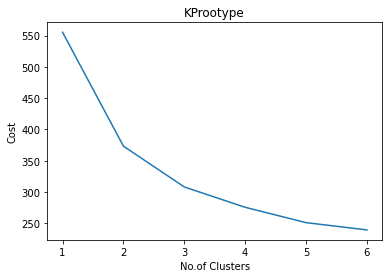

In [41]:
cost=[]
for i in range(1,7):
    kproto=KPrototypes(n_clusters=i,verbose=2,max_iter=5)
    kproto.fit(ewa2,categorical=cat_idx)
    cost.append(kproto.cost_)
plt.plot(range(1,7),cost)
plt.title('KProotype')
plt.xlabel("No.of Clusters")
plt.ylabel("Cost")
plt.show()

In [42]:

kproto1=KPrototypes(n_clusters=4,verbose=2,max_iter=20)
kp=kproto1.fit(ewa2,categorical=cat_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 827, ncost: 298.0041426277577
Run: 1, iteration: 2/20, moves: 523, ncost: 284.17128007048814
Run: 1, iteration: 3/20, moves: 282, ncost: 279.25058294989134
Run: 1, iteration: 4/20, moves: 156, ncost: 277.60356595035637
Run: 1, iteration: 5/20, moves: 106, ncost: 277.0950254595568
Run: 1, iteration: 6/20, moves: 56, ncost: 276.99349004135547
Run: 1, iteration: 7/20, moves: 22, ncost: 276.97705748461925
Run: 1, iteration: 8/20, moves: 8, ncost: 276.9730332230987
Run: 1, iteration: 9/20, moves: 0, ncost: 276.9730332230987
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 1051, ncost: 290.6957971520067
Run: 2, iteration: 2/20, moves: 380, ncost: 280.2212396909429
Run: 2, iteration: 3/20, moves: 114, ncost: 279.81904106024245
Run: 2, iteration: 

In [43]:
ewa1['Clusters_kprototype']=kproto1.labels_

In [44]:
kpro_score=silhouette_score(ewa2,kproto1.labels_,metric='euclidean')
kpro_score

0.18157551677218578

In [46]:
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_dbscan,Clusters_kmeans,Clusters_hc,Clusters_kprototype
0,28143,0,1,1,1,174,1,0,0,7000,0,0,4,2,3
1,19244,0,1,1,1,215,2,0,0,6968,0,0,4,2,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,4,2,3
3,14776,0,1,1,1,500,1,0,0,6952,0,0,4,2,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,0,2


In [47]:
from sklearn.decomposition import PCA
pca=PCA(2)
df_ewa=pca.fit_transform(ewa2)
df_ewa.shape

(3999, 2)

# Kprototype Clustering Plot

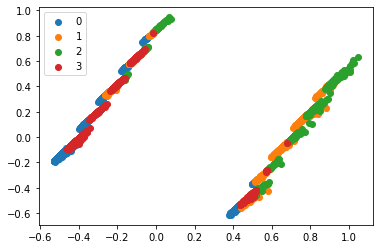

In [48]:
d=np.unique(kp.labels_)

#plotting KPrototype clusters using tranformed data using 'PCA'
for i in d:
    plt.scatter(df_ewa[kp.labels_==i,0],df_ewa[kp.labels_==i,1],label=i)
plt.legend()
plt.show()
    

# Hierarchical Clustering Plot

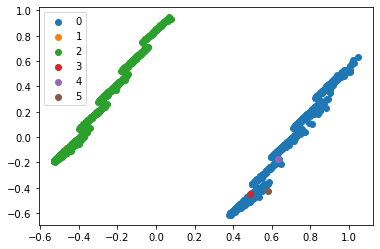

In [49]:
e=np.unique(ew_hc.labels_)
#using ew_hc which is Hierarchical Clustering model 
for i in e:
    plt.scatter(df_ewa[ew_hc.labels_==i,0],df_ewa[ew_hc.labels_==i,1],label=i)
plt.legend()
plt.show()

# Kmeans Clustering Plot

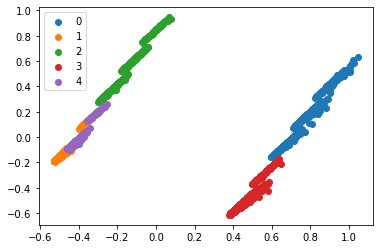

In [50]:
f=np.unique(ew_kmeans.labels_)
for i in f:
    plt.scatter(df_ewa[ew_kmeans.labels_==i,0],df_ewa[ew_kmeans.labels_==i,1],label=i)
plt.legend()
plt.show()

# DBscan Clustering Plot

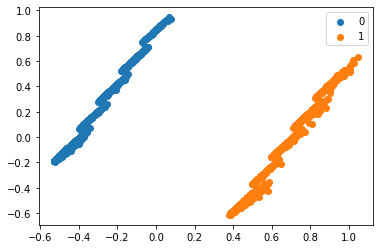

In [51]:
g=np.unique(ew_dbscan.labels_)
for i in g:
    plt.scatter(df_ewa[ew_dbscan.labels_==i,0],df_ewa[ew_dbscan.labels_==i,1],label=i)
plt.legend()
plt.show()

In [52]:
ewa1[ewa1['Clusters_kprototype']==0].mean(),ewa1[ewa1['Clusters_kprototype']==1].mean()

(Balance                41175.957143
 Qual_miles               107.511429
 cc1_miles                  1.322857
 cc2_miles                  1.015714
 cc3_miles                  1.005714
 Bonus_miles             6208.235000
 Bonus_trans                7.124286
 Flight_miles_12mo        237.305714
 Flight_trans_12            0.698571
 Days_since_enroll       2069.655000
 Award?                     0.138571
 Clusters_dbscan            0.138571
 Clusters_kmeans            1.449286
 Clusters_hc                1.721429
 Clusters_kprototype        0.000000
 dtype: float64,
 Balance                85985.850000
 Qual_miles               185.295714
 cc1_miles                  3.081429
 cc2_miles                  1.014286
 cc3_miles                  1.014286
 Bonus_miles            29408.552857
 Bonus_trans               19.048571
 Flight_miles_12mo        892.247143
 Flight_trans_12            2.510000
 Days_since_enroll       3326.154286
 Award?                     0.767143
 Clusters_dbscan     

In [53]:
ewa1[ewa1['Clusters_kprototype']==2].mean()

Balance                154616.984293
Qual_miles                229.743455
cc1_miles                   3.830716
cc2_miles                   1.012216
cc3_miles                   1.052356
Bonus_miles             49655.966841
Bonus_trans                21.289703
Flight_miles_12mo         891.383944
Flight_trans_12             2.935428
Days_since_enroll        6393.354276
Award?                      0.876091
Clusters_dbscan             0.876091
Clusters_kmeans             0.682373
Clusters_hc                 0.254799
Clusters_kprototype         2.000000
dtype: float64

In [54]:
from tabulate import tabulate
table=[['Clustering Algorithm','No. of Clusters','Silhouette Score'],
['DBSCAN','3',db_score],
['KMeans','7',km_score],
['Hierarchical Clustering','6',hc_score],
['Kprototype','4',kpro_score]]

In [55]:
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid',showindex=range(1,5)))

╒════╤═════════════════════════╤═══════════════════╤════════════════════╕
│    │ Clustering Algorithm    │   No. of Clusters │   Silhouette Score │
╞════╪═════════════════════════╪═══════════════════╪════════════════════╡
│  1 │ DBSCAN                  │                 3 │           0.535931 │
├────┼─────────────────────────┼───────────────────┼────────────────────┤
│  2 │ KMeans                  │                 7 │           0.443067 │
├────┼─────────────────────────┼───────────────────┼────────────────────┤
│  3 │ Hierarchical Clustering │                 6 │           0.432793 │
├────┼─────────────────────────┼───────────────────┼────────────────────┤
│  4 │ Kprototype              │                 4 │           0.181576 │
╘════╧═════════════════════════╧═══════════════════╧════════════════════╛


# We can see from the Silhouette Score that DBSCAN works well on this dataset, with a score of 0.53 on a scale of -1 to 1, where -1 represents the poorest clustering and 1 represents the greatest clustering score.
